In [30]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [33]:
data = load_breast_cancer()

In [34]:
x = data.data
y = data.target
data.data.shape

(569, 30)

In [11]:
lrl1 = lr(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = lr(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [12]:
lrl1 = lrl1.fit(x,y)

In [14]:
lrl1.coef_ #l1会压缩特征,压缩剩下10个

array([[ 4.00342809,  0.03206651, -0.13756861, -0.01622194,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50508778,  0.        , -0.07127767,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24593251, -0.12858229, -0.01440778,  0.        ,
         0.        , -2.03770485,  0.        ,  0.        ,  0.        ]])

In [20]:
(lrl1.coef_!=0).sum()

10

In [16]:
lrl2 = lrl2.fit(x,y)

In [17]:
lrl2.coef_ #l2不会压缩特征

array([[ 1.61538297e+00,  1.02313837e-01,  4.80876166e-02,
        -4.46179116e-03, -9.44039119e-02, -3.01456060e-01,
        -4.56317796e-01, -2.22624403e-01, -1.35942213e-01,
        -1.93988281e-02,  1.58430227e-02,  8.85192776e-01,
         1.18955775e-01, -9.46472011e-02, -9.84012568e-03,
        -2.35225444e-02, -5.70150907e-02, -2.70449403e-02,
        -2.77929242e-02,  2.34246606e-04,  1.26123273e+00,
        -3.01768987e-01, -1.72568144e-01, -2.21620160e-02,
        -1.73685380e-01, -8.78991654e-01, -1.16355518e+00,
        -4.28212549e-01, -4.21484675e-01, -8.69878596e-02]])

In [92]:
l1 = []
l2 = []
l1test=[]
l2test=[]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=420)
for i in np.linspace(0.01,1,30):
    lrl1 = lr(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = lr(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(xtrain,ytrain)
    l1.append(accuracy_score(lrl1.predict(xtrain),ytrain))
    l1test.append(accuracy_score(lrl1.predict(xtest),ytest))
    
    lrl2 = lrl2.fit(xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest),ytest))

In [93]:
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","blue"]
label = ["L1","L2","L1test","L2test"]

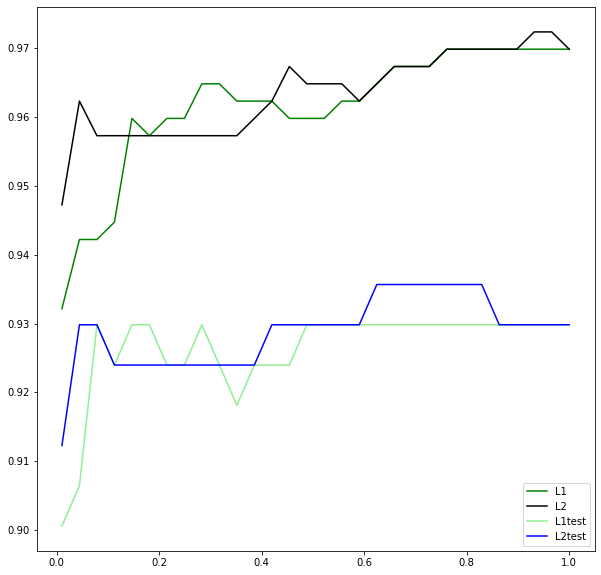

In [95]:
plt.figure(figsize=(10,10))
for i in range(len(graph)):
    plt.plot(np.linspace(0.01,1,30),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()